# Visualizing the data

In [1]:
import pandas as pd
import dataloader
import os

In [2]:
events = pd.read_csv(os.path.join('data', 'train_events.csv'))
# events.head()

,series_id,night,event,step,timestamp
0,038441c925bb,1,onset,4992.0,2018-08-14T22:26:00-0400
1,038441c925bb,1,wakeup,10932.0,2018-08-15T06:41:00-0400
2,038441c925bb,2,onset,20244.0,2018-08-15T19:37:00-0400
3,038441c925bb,2,wakeup,27492.0,2018-08-16T05:41:00-0400
4,038441c925bb,3,onset,39996.0,2018-08-16T23:03:00-0400


In [3]:
nacheck = events.isna()
nacheck['series_id'] = events['series_id']
nacount = nacheck.groupby('series_id').sum()
good_sids = nacount[nacount['step']==0].index
# good_sids

Index(['08db4255286f', '0a96f4993bd7', '0cfc06c129cc', '1087d7b0ff2e',
       '10f8bc1f7b07', '18b61dd5aae8', '29c75c018220', '31011ade7c0a',
       '3452b878e596', '349c5562ee2c', '3664fe9233f9', '483d6545417f',
       '55a47ff9dc8a', '5acc9d63b5fd', '5f94bb3e1bed', '655f19eabf1e',
       '67f5fc60e494', '72bbd1ac3edf', '76237b9406d5', '7822ee8fe3ec',
       '89bd631d1769', '8e32047cbc1f', '939932f1822d', '9ee455e4770d',
       'a596ad0b82aa', 'a9a2f7fac455', 'a9e5f5314bcb', 'af91d9a50547',
       'b364205aba43', 'c535634d7dcd', 'c6788e579967', 'c68260cc9e8f',
       'ca730dbf521d', 'd150801f3145', 'd25e479ecbb7', 'd515236bdeec',
       'd5e47b94477e'],
      dtype='object', name='series_id')

In [4]:
sid = good_sids[0]
# sid

'08db4255286f'

In [5]:
# dataloader.init()

In [6]:
acc_data = dataloader.acc_data_for_child(sid)

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='anglez', ylabel='enmo'>

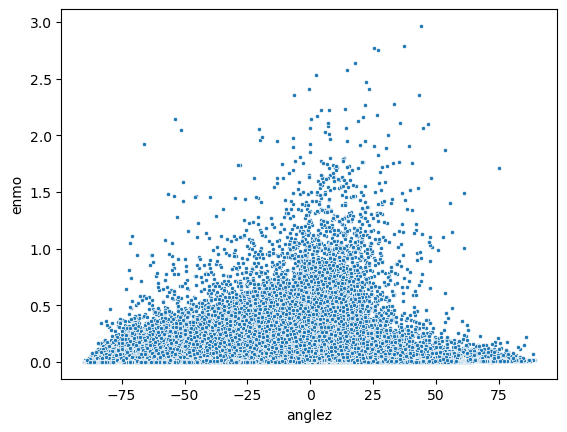

In [8]:
# fig, ax = plt.subplots()
# sns.scatterplot(data=acc_data, x='anglez', y='enmo', marker='.')

In [9]:
# lets figure out how to categorize this as sleeping or awake
# given a timestamp is it awake or asleep
# events[events['series_id']]
event = events[events['series_id']==sid]['event']
step = events[events['series_id']==sid]['step']
# Lets ensure that the events are all `onset then wakeup`
assert set([i==('onset', 'wakeup') for i in zip(event[:-1:2], event[1::2])]) == set([True])
sleeping = sum([(acc_data['step'] >= onset) & (acc_data['step'] < wakeup) for onset, wakeup in zip(step[:-1:2], step[1::2])])
# sleeping

0         0
1         0
2         0
3         0
4         0
         ..
440275    0
440276    0
440277    0
440278    0
440279    0
Name: step, Length: 440280, dtype: int32

In [10]:
acc_data['activity'] = ['Sleeping' if i else 'Waking' for i in sleeping]
# acc_data.sample(10)

,series_id,step,timestamp,anglez,enmo,activity
361336,08db4255286f,361336,2018-11-26T06:51:20-0500,21.370701,0.0057,Waking
357110,08db4255286f,357110,2018-11-26T00:59:10-0500,-33.517799,0.0104,Sleeping
38994,08db4255286f,38994,2018-11-07T16:09:30-0400,-20.542299,0.0050,Waking
377151,08db4255286f,377151,2018-11-27T04:49:15-0500,-78.034897,0.0005,Waking
245817,08db4255286f,245817,2018-11-19T14:24:45-0500,-40.515900,0.3666,Waking
168038,08db4255286f,168038,2018-11-15T02:23:10-0500,-77.195198,0.0000,Sleeping
191188,08db4255286f,191188,2018-11-16T10:32:20-0500,-33.893101,0.1433,Waking
14445,08db4255286f,14445,2018-11-06T06:03:45-0400,-5.507200,0.0762,Waking
10981,08db4255286f,10981,2018-11-06T01:15:05-0400,-66.119698,0.1012,Waking
205321,08db4255286f,205321,2018-11-17T06:10:05-0500,14.865000,0.0056,Sleeping


<Axes: xlabel='anglez', ylabel='enmo'>

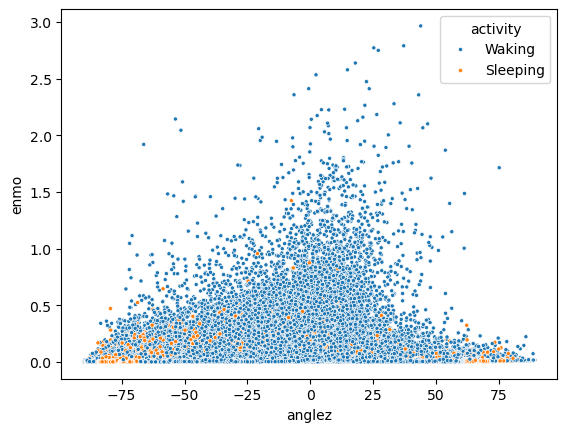

In [11]:
# fig, ax = plt.subplots()
# sns.scatterplot(ax=ax, data=acc_data, x='anglez', y='enmo', hue='activity', marker='.')

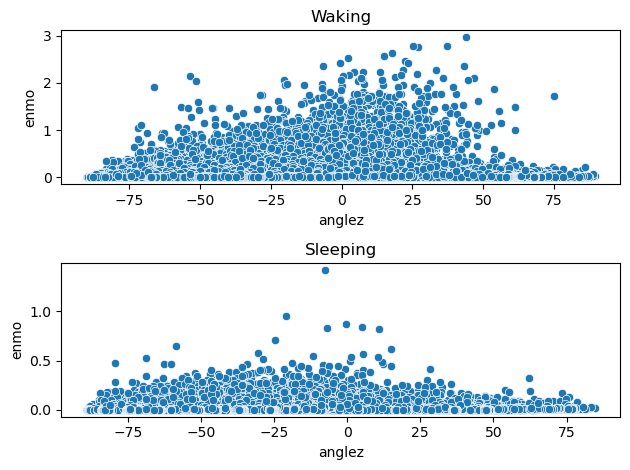

In [12]:
# fig, axs = plt.subplots(nrows=2)
# sns.scatterplot(ax=axs[0], data=acc_data.loc[acc_data['activity']=='Waking'], x='anglez', y='enmo')
# axs[0].set_title('Waking')
# sns.scatterplot(ax=axs[1], data=acc_data.loc[acc_data['activity']=='Sleeping'], x='anglez', y='enmo')
# axs[1].set_title('Sleeping')
# fig.tight_layout()

In [18]:
import matplotlib.animation as anim
import tqdm

fig, ax = plt.subplots()
ax.set_xlim(-100, 100)
ax.set_ylim(-0.5, 3.5)
point = ax.scatter(2, 1)

tqiter = iter(tqdm.tqdm(range(len(acc_data))))



def animate(step):
    x, y = acc_data.loc[acc_data['step']==step, ['anglez', 'enmo']].iloc[0]
    point.set_offsets((x, y))
    next(tqiter)
    return (point,)

ani = anim.FuncAnimation(fig, animate, frames=len(acc_data), interval=0.5, blit=True)

ani.save('scatter.gif')


  0%|          | 1/440280 [00:11<1352:59:03, 11.06s/it]


MovieWriter ffmpeg unavailable; using Pillow instead.


: 